# Load the image

In [1]:
import matplotlib.pyplot as plt
import cv2

In [5]:
im=cv2.imread('elephant.jpg')
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

In [6]:
print(im.shape)

(330, 500, 3)


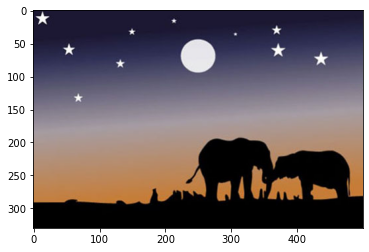

In [7]:
plt.imshow(im)
plt.show()

In [8]:
all_pixels=im.reshape((-1,3))

In [9]:
all_pixels.shape

(165000, 3)

# Applying K-Means Algorithm to get 4 dominant colors

In [10]:

from sklearn.cluster import KMeans

In [13]:
dominant_colors=4

In [14]:
km=KMeans(n_clusters=dominant_colors)

In [15]:
km.fit(all_pixels)

KMeans(n_clusters=4)

In [16]:
centres=km.cluster_centers_

In [18]:
import numpy as np
centres=np.array(centres,dtype="uint8")

In [19]:
print(centres)

[[174 145 128]
 [ 38  35  64]
 [  1   0   1]
 [ 99  95 118]]


# Plotting what all colors we got!

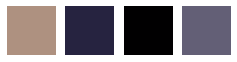

In [21]:
# plot these colors
i=1
plt.figure(0,figsize=(4,2))

colors=[]
for each_col in centres:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    colors.append(each_col)
    
    a=np.zeros((100,100,3),dtype="uint8")
    a[:,:,:]=each_col
    plt.imshow(a)
    
plt.show()
    

# Image Segmentation

In [22]:
new_img=np.zeros((330*500,3),dtype='uint8')

In [23]:
km.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [25]:
colors

[array([174, 145, 128], dtype=uint8),
 array([38, 35, 64], dtype=uint8),
 array([1, 0, 1], dtype=uint8),
 array([ 99,  95, 118], dtype=uint8)]

In [26]:
for ix in range(new_img.shape[0]):
    new_img[ix]=colors[km.labels_[ix]]

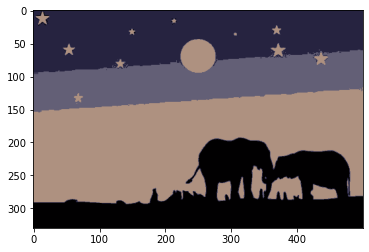

In [27]:
new_img=new_img.reshape((330,500,3))
plt.imshow(new_img)
plt.show()